#### 1 Importing the required Lybraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

##### -------------------------------------------------------------------------------
#### 2 Data Importing process
######   Merging all the excel files as on csv using the Symbol column to join the data after   importing each excel file to my working folder
##### -------------------------------------------------------------------------------

In [ ]:
# Listing the files to be merged
file_paths = [
    'Coffee-2012.xlsx',
    'Coffee-2013.xlsx',
    'Coffee-2014.xlsx',
    'Coffee-2015.xlsx',
    'Coffee-2016.xlsx',
    'Coffee-2017.xlsx',
    'Coffee-2018.xlsx',
    'Coffee-2019.xlsx']

# Reading and merging the files
dfs = [pd.read_excel(file) for file in file_paths]

merged_df = pd.concat(dfs, ignore_index=True)

# Saving the merged DataFrame to a CSV file
merged_df.to_csv('ethiopian_coffee_exchange_data.csv', index=False)

print("Data merged and saved to 'ethiopian_coffee_exchange_data.csv'.")

In [2]:
df = pd.read_csv('ethiopian_coffee_exchange_data.csv')
df.head()

,Trade Date,Symbol,Warehouse,Production Year,Opening Price,Closing Price,High,Low,Change,Persetntage Change,Volume (Ton)
0,2012-01-02,WYKQ2,BG,2004,"1,175.00",0.00,"1,175.00","1,175.00",0,0.0,28.29
1,2012-01-03,WYKQ2,BG,2004,"1,175.00",0.00,"1,175.00","1,175.00",0,0.0,10.80
2,2012-01-04,WYKQ2,BG,2004,"1,180.00",0.00,"1,180.00","1,180.00",0,0.0,6.61
3,2012-01-06,WYKQ2,BG,2004,"1,175.00",0.00,"1,175.00","1,175.00",0,0.0,8.99
4,2012-01-12,WYKQ2,BG,2004,"1,293.00",0.00,"1,293.00","1,280.00",0,0.0,18.00


In [3]:
df.describe()

,Production Year,Change,Volume (Ton)
count,91423.000000,91423.000000,91423.000000
mean,2007.398106,24.979907,22.745432
std,2.366144,58.014626,29.990070
min,2002.000000,0.000000,1.800000
25%,2005.000000,0.000000,6.830000
50%,2007.000000,10.000000,12.750000
75%,2009.000000,29.000000,25.500000
max,2011.000000,2230.000000,596.700000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91423 entries, 0 to 91422
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trade Date          91423 non-null  object 
 1   Symbol              91423 non-null  object 
 2   Warehouse           91423 non-null  object 
 3   Production Year     91423 non-null  int64  
 4   Opening Price       91423 non-null  object 
 5   Closing Price       91423 non-null  object 
 6   High                91423 non-null  object 
 7   Low                 91423 non-null  object 
 8   Change              91423 non-null  int64  
 9   Persetntage Change  91423 non-null  object 
 10  Volume (Ton)        91423 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 7.7+ MB


#### ---------------------------------------------------------------------------------------
#### *Explanation
###### After importing the excel files and concating to one csv. The excel files those are separated by year from 2012 to 2019 all stored in one table with total number of records 91,423. Then call the file as (ethiopian_coffee_exchange_data.csv)
###### And also there are many columns having error data type, which must be corrected in the data cleaning stage 
#### ----------------------------------------------------------------------------------------


#### 3 Data Cleaning Process

In [5]:
et_coffee_x = df.copy()

In [6]:
et_coffee_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91423 entries, 0 to 91422
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Trade Date          91423 non-null  object 
 1   Symbol              91423 non-null  object 
 2   Warehouse           91423 non-null  object 
 3   Production Year     91423 non-null  int64  
 4   Opening Price       91423 non-null  object 
 5   Closing Price       91423 non-null  object 
 6   High                91423 non-null  object 
 7   Low                 91423 non-null  object 
 8   Change              91423 non-null  int64  
 9   Persetntage Change  91423 non-null  object 
 10  Volume (Ton)        91423 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 7.7+ MB


In [7]:
# Converting data types

# Converting 'Trade Date' and 'Production Year' to datetime
et_coffee_x['Trade Date'] = pd.to_datetime(et_coffee_x['Trade Date'], format='%Y-%m-%d')
et_coffee_x['Production Year'] = pd.to_datetime(et_coffee_x['Production Year'], format='%Y')

# Converting numeric columns to float and removing percentage sign from 'Percentage Change' 
et_coffee_x['Opening Price'] = pd.to_numeric(et_coffee_x['Opening Price'], errors='coerce')
et_coffee_x['Closing Price'] = pd.to_numeric(et_coffee_x['Closing Price'], errors='coerce')
et_coffee_x['High'] = pd.to_numeric(et_coffee_x['High'], errors='coerce')
et_coffee_x['Low'] = pd.to_numeric(et_coffee_x['Low'], errors='coerce') 

# Creating a new column for percentage change and change the data type of 'Persetntage Change' from object to float
et_coffee_x['percent_change'] = et_coffee_x['Persetntage Change'].str.replace('%', '').astype(float) / 100

# Dropping the original 'Persetntage Change' column
et_coffee_x.drop(columns=['Persetntage Change'], inplace=True)

In [8]:
# Checking for null values
et_coffee_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91423 entries, 0 to 91422
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Trade Date       91423 non-null  datetime64[ns]
 1   Symbol           91423 non-null  object        
 2   Warehouse        91423 non-null  object        
 3   Production Year  91423 non-null  datetime64[ns]
 4   Opening Price    41253 non-null  float64       
 5   Closing Price    46055 non-null  float64       
 6   High             40943 non-null  float64       
 7   Low              41553 non-null  float64       
 8   Change           91423 non-null  int64         
 9   Volume (Ton)     91423 non-null  float64       
 10  percent_change   91423 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 7.7+ MB


In [9]:
# Counting the amount of null values in each columns
null_values = et_coffee_x.isnull().sum()
null_values

Trade Date             0
Symbol                 0
Warehouse              0
Production Year        0
Opening Price      50170
Closing Price      45368
High               50480
Low                49870
Change                 0
Volume (Ton)           0
percent_change         0
dtype: int64

In [10]:
# Dropping null values in specific columns
et_coffee_x.dropna(subset=['Opening Price', 'Closing Price', 'High', 'Low'], inplace=True)

In [11]:
et_coffee_x.isna().sum()

Trade Date         0
Symbol             0
Warehouse          0
Production Year    0
Opening Price      0
Closing Price      0
High               0
Low                0
Change             0
Volume (Ton)       0
percent_change     0
dtype: int64

In [12]:
et_coffee_x.duplicated().sum()

np.int64(0)

In [13]:
et_coffee_x.describe()

,Trade Date,Production Year,Opening Price,Closing Price,High,Low,Change,Volume (Ton),percent_change
count,40943,40943,40943.000000,40943.000000,40943.000000,40943.000000,40943.000000,40943.000000,40943.000000
mean,2015-05-13 17:17:47.171433472,2006-07-10 10:30:22.025742976,770.027038,657.627262,771.765503,768.359597,20.429890,23.570076,0.025969
min,2012-01-02 00:00:00,2002-01-01 00:00:00,99.000000,0.000000,99.000000,99.000000,0.000000,1.800000,0.000000
25%,2013-05-30 00:00:00,2005-01-01 00:00:00,710.000000,540.000000,710.000000,710.000000,0.000000,6.300000,0.000000
50%,2015-05-27 00:00:00,2006-01-01 00:00:00,820.000000,795.000000,820.000000,817.000000,8.000000,12.750000,0.010000
75%,2017-01-05 00:00:00,2008-01-01 00:00:00,900.000000,875.000000,900.000000,899.000000,20.000000,28.050000,0.030000
max,2019-09-13 00:00:00,2011-01-01 00:00:00,999.000000,999.000000,999.000000,999.000000,1060.000000,465.920000,2.850000
std,NaN,NaN,180.816240,314.283336,181.114093,180.481256,52.165701,30.988650,0.071412


In [14]:
et_coffee_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40943 entries, 22 to 91422
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Trade Date       40943 non-null  datetime64[ns]
 1   Symbol           40943 non-null  object        
 2   Warehouse        40943 non-null  object        
 3   Production Year  40943 non-null  datetime64[ns]
 4   Opening Price    40943 non-null  float64       
 5   Closing Price    40943 non-null  float64       
 6   High             40943 non-null  float64       
 7   Low              40943 non-null  float64       
 8   Change           40943 non-null  int64         
 9   Volume (Ton)     40943 non-null  float64       
 10  percent_change   40943 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.7+ MB


#### ----------------------------------------------------------------------------------
##### * Explanation
###### After the data cleaning process, The date and numeric columns converted to the exact data type for required analytical quastion.
###### And after droping null values from some columns, now it is easy and clear to show that the stastical destribution of the numeric columns.
###### And drop percente change column after creating another column and convert the data type to foat
##### ----------------------------------------------------------------------------------------

#### 4 Exploratory Data Analysis

#### 4.1. Price Trends Over Time
###### How did the average opening/closing price of coffee change over time (monthly/quarterly/yearly)?
##### *by Year

In [15]:
yearly_price_trade = et_coffee_x[['Opening Price', 'Closing Price']].groupby(et_coffee_x['Trade Date'].dt.year).mean().reset_index()
yearly_price_trade.sort_values(by='Trade Date', inplace=True)
yearly_price_trade

,Trade Date,Opening Price,Closing Price
0,2012,810.982503,7.583289
1,2013,751.324492,741.467911
2,2014,754.281203,754.277255
3,2015,759.949165,758.911923
4,2016,702.795426,701.752026
5,2017,784.647370,784.951987
6,2018,805.564906,805.682781
7,2019,869.555685,869.389019


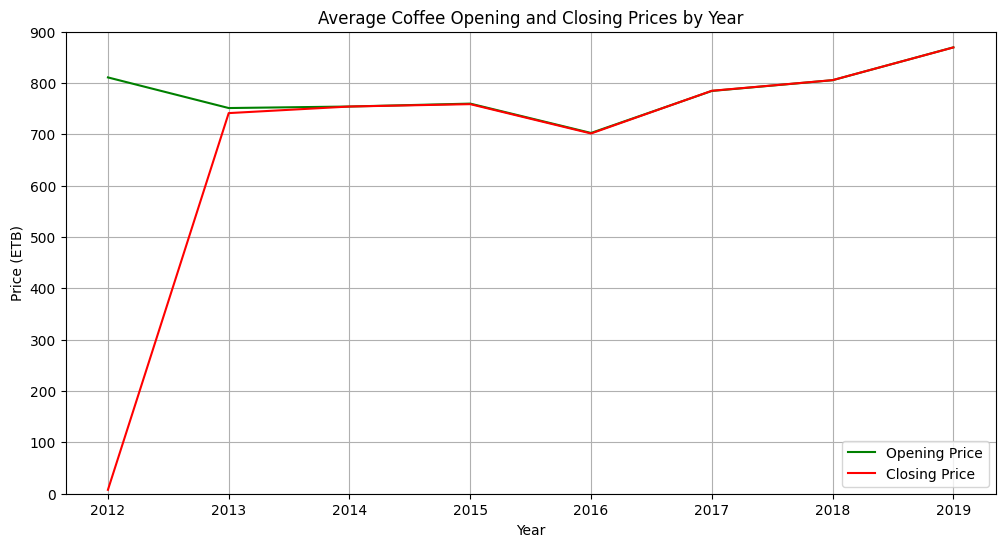

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_price_trade['Trade Date'], yearly_price_trade['Opening Price'], label='Opening Price', color='green')
plt.plot(yearly_price_trade['Trade Date'], yearly_price_trade['Closing Price'], label='Closing Price', color='red')
plt.title('Average Coffee Opening and Closing Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (ETB)')
plt.ylim(0, 900)
plt.legend()
plt.grid(True)
plt.show()

##### -------------------------------------------------------------------------------
#### * Findings from Yearly Coffee Price Trends
###### Ethiopian coffee prices showed a general upward trend from 2013 to 2019, with a notable low in 2016 and a peak in 2019. The 2012 data appears to be an outlier and should be checked for accuracy.
###### -The average closing price for 2012 (7.58 ETB) is extremely low compared to the opening price (810.98 ETB)
###### - From 2013 to 2019, both the average opening and closing prices of Ethiopian coffee generally increased, indicating a positive price trend over the years.
###### - The lowest average prices were observed in 2016, with an opening price of 702.80 ETB and a closing price of 701.75 ETB.
###### - The highest average prices occurred in 2019, with an opening price of 869.56 ETB and a closing price of 869.39 ETB.
##### -------------------------------------------------------------------------------


##### * by Quarter

In [17]:
quater_price_trade = et_coffee_x[['Closing Price', 'Opening Price']].groupby(et_coffee_x['Trade Date'].dt.to_period('Q')).mean()
quater_price_trade.head().reset_index()

,Trade Date,Closing Price,Opening Price
0,2012Q1,0.000000,895.182171
1,2012Q2,0.000000,826.625285
2,2012Q3,0.000000,814.133978
3,2012Q4,22.580542,770.855396
4,2013Q1,725.314443,761.173947


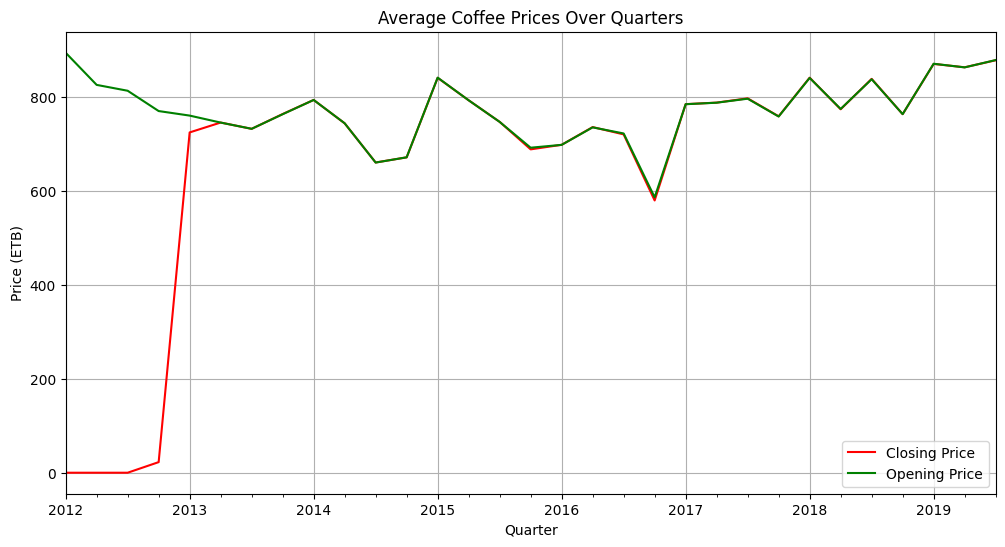

In [18]:
quater_price_trade.plot(kind='line', figsize=(12, 6), title='Average Coffee Prices Over Quarters', color=['red', 'green'])
   
plt.xlabel('Quarter')
plt.ylabel('Price (ETB)')
plt.grid()    
plt.show()

##### -------------------------------------------------------------------------------
#### * Findings from Quarterly Coffee Price Trends
###### -2012 Data Anomaly:  For the first three quarters of 2012 (Q1–Q3), the average closing price is 0.00 ETB, which is unrealistic and suggests missing or erroneous data for those periods. Only in Q4 2012 does the closing price become nonzero (22.58 ETB), but it is still extremely low compared to the opening price.
###### -Opening Price in 2012:The average opening prices in 2012 are high, starting at 895.18 ETB in Q1 and gradually decreasing to 770.86 ETB by Q4.
###### -2013 Q1 Recovery:In 2013 Q1, the closing price jumps to 725.31 ETB, and the opening price is 761.17 ETB, indicating a return to more realistic and consistent pricing after the anomalies in 2012.
###### -Quarterly Trend:The data suggests that after the anomalous 2012, both opening and closing prices stabilize and become more consistent starting from 2013 Q1.
##### -------------------------------------------------------------------------------

##### * by Month

In [19]:
month_price_trade = et_coffee_x[['Closing Price', 'Opening Price']].groupby(et_coffee_x['Trade Date'].dt.month).mean()
month_price_trade.reset_index()

,Trade Date,Closing Price,Opening Price
0,1,735.207398,776.920740
1,2,781.510579,791.610523
2,3,726.354078,809.268267
3,4,691.095851,793.504803
4,5,656.001507,779.719166
5,6,645.775779,761.472764
6,7,646.916667,756.752717
7,8,625.697058,773.721758
8,9,584.334771,760.691976
9,10,561.262634,758.961332


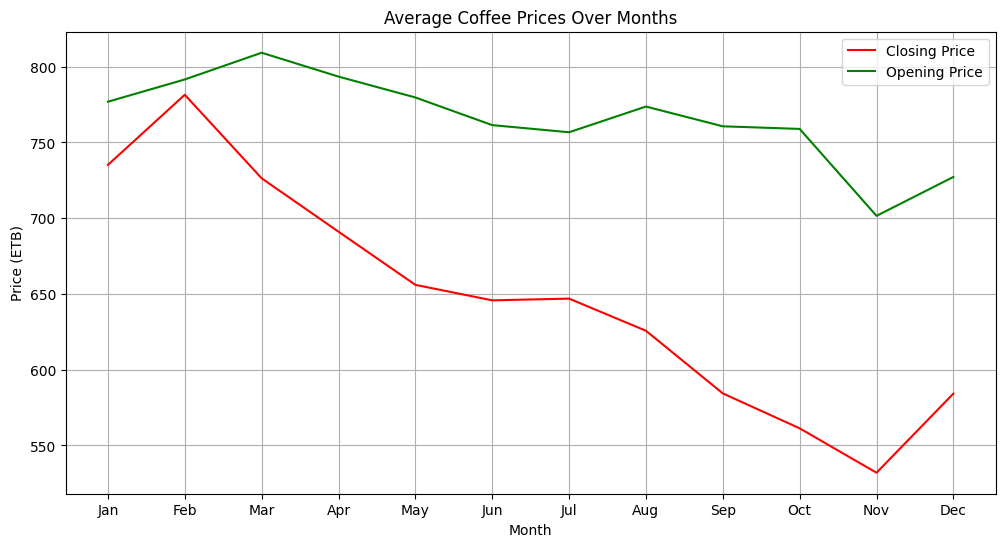

In [20]:
month_price_trade.plot(kind='line', figsize=(12, 6), title='Average Coffee Prices Over Months', color=['red', 'green'])
month_price_trade = month_price_trade.reindex(range(1, 13))
plt.ylabel('Price (ETB)')           
plt.xlabel('Month')
plt.xticks(ticks=range(1,13), labels=[calendar.month_abbr[m] for m in range(1, 13)])
plt.grid()  
plt.show()

##### -------------------------------------------------------------------------------
#### * Findings from Monthly Coffee Price Trends
###### The data suggests a seasonal pattern, with prices peaking in the early months of the year and declining towards the end, before a small recovery in December.
###### - The highest average opening and closing prices are observed in February (Opening: 791.61 ETB, Closing: 781.51 ETB) and March (Opening: 809.27 ETB, Closing: 726.35 ETB).
###### - Both opening and closing prices show a steady decline from March through November, reaching their lowest in November (Opening: 701.56 ETB, Closing: 531.96 ETB).
###### - The lowest average closing price occurs in November (531.96 ETB), while the lowest opening price is also in November (701.56 ETB).
###### - There is a slight increase in both opening (727.24 ETB) and closing (584.20 ETB) prices in December compared to November.
###### - The data suggests a seasonal pattern, with prices peaking in the early months of the year and declining towards the end, before a small recovery in December.
##### -------------------------------------------------------------------------------

#### * Warwhouse and Production Insights
##### * Which warehouse trade coffee at the highest average price

In [21]:
trade_by_warehouse = et_coffee_x[['High', 'Low']].groupby(et_coffee_x['Warehouse']).mean()
trade_by_warehouse.reset_index().head()

,Warehouse,High,Low
0,B1,766.282258,764.362903
1,B2,668.937500,666.854167
2,BD,785.854694,783.056536
3,BG,764.375000,761.773746
4,BH,736.123596,734.988764


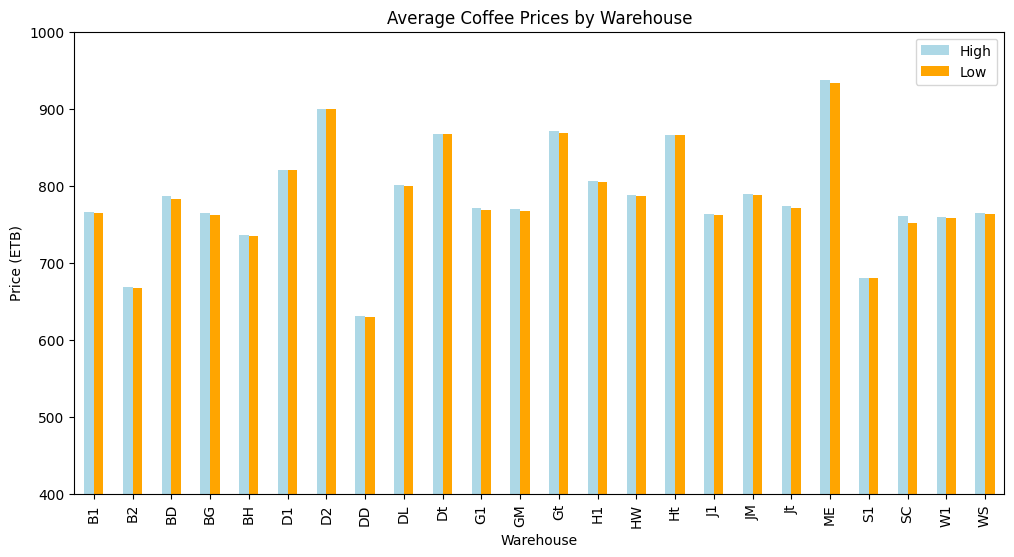

In [22]:
trade_by_warehouse.plot(kind='bar', figsize=(12,6), title='Average Coffee Prices by Warehouse', color=['lightblue', 'orange'])
plt.xlabel('Warehouse')
plt.ylabel('Price (ETB)')
plt.ylim(400, 1000)
plt.show()

##### -------------------------------------------------------------------------------
##### *Findings from Average Coffee Prices by Warehouse
###### There is considerable variation in average coffee prices across warehouses. Warehouses like ME, D2, and Gt achieve the highest prices, possibly reflecting higher quality or demand. In contrast, warehouses such as DD and BD have the lowest prices. Some warehouses maintain stable prices throughout trading, while others experience significant price changes, highlighting differences in market activity, coffee quality, or trading practices among warehouses.
###### -Highest Average Prices: The warehouse ME has the highest average opening (934.47 ETB) and closing (935.03 ETB) prices, followed by D2 (900.00 ETB for both) and Gt (Opening: 869.91 ETB, Closing: 870.38 ETB). These warehouses likely handle premium or specialty coffee lots.

###### -Lowest Average Prices: The lowest average opening and closing prices are observed at DD (Opening: 630.34 ETB, Closing: 586.93 ETB) and BD (Opening: 784.45 ETB, Closing: 614.10 ETB), indicating these warehouses may handle lower-grade or bulk coffee.

###### -Price Consistency: Some warehouses, such as W1 and D2, show very little difference between opening and closing prices, suggesting stable trading activity and minimal price fluctuation during trading sessions.

###### -Significant Price Drops: Warehouses like BD, GM, and JM show a large gap between opening and closing prices, indicating possible price drops during trading, which could be due to market dynamics or quality issues.
##### -------------------------------------------------------------------------------




#####  * Deos the Production Year affect coffee  price?

In [23]:
price_by_production_year = et_coffee_x[['High', 'Low']].groupby(et_coffee_x['Production Year'].dt.year).mean()
price_by_production_year.reset_index()

,Production Year,High,Low
0,2002,714.444444,714.444444
1,2003,701.420624,697.732022
2,2004,778.938507,775.910364
3,2005,759.446043,758.090647
4,2006,749.264247,746.801140
5,2007,740.028813,738.375773
6,2008,734.291167,730.377698
7,2009,811.168165,805.226585
8,2010,854.720305,843.552970
9,2011,888.222599,884.575170


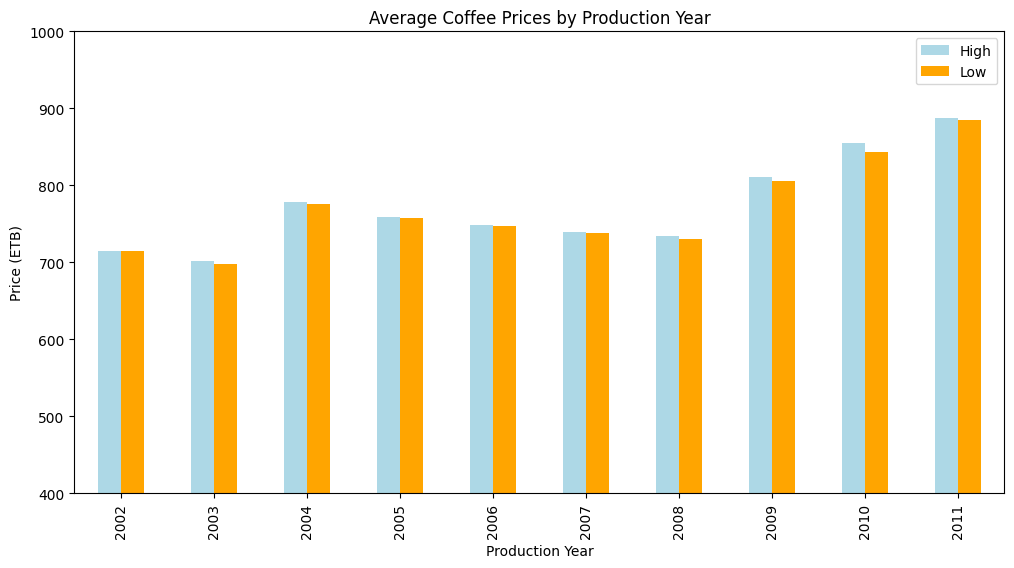

In [24]:
price_by_production_year.plot(kind='bar', figsize=(12,6), title='Average Coffee Prices by Production Year', color=['lightblue', 'orange'])
plt.xlabel('Production Year')   
plt.ylabel('Price (ETB)')
plt.ylim(400, 1000)
plt.show()

##### -------------------------------------------------------------------------------
##### *Findings from average coffee price by production year:
###### Coffee prices by production year show a steady upward trend from 2003 to 2011, with the highest values in 2011 and the lowest in 2003. The price gap between high and low remains minimal, indicating a stable market across the years.
###### -Lowest Prices in Early Years: The lowest average high and low prices are observed in 2003 (High: 701.42 ETB, Low: 697.73 ETB), indicating a period of lower market value for coffee.

###### -Gradual Increase Over Time: From 2003 to 2011, both the high and low prices generally increased, showing a positive trend in coffee prices over the years.

###### -Peak Prices in 2011: The highest average prices occurred in 2011 (High: 888.22 ETB, Low: 884.58 ETB), marking the peak of the observed period.

###### -Narrowing Price Gap: The difference between high and low prices is consistently small each year, suggesting stable pricing and low volatility within each production year.
##### -------------------------------------------------------------------------------


#####  *Which warehouse has the highest trading Volume (Ton)?

In [25]:
rank_warehouse_by_volume = et_coffee_x.groupby('Warehouse')['Volume (Ton)'].sum().reset_index()
rank_warehouse_by_volume.sort_values(by='Volume (Ton)', ascending=False, inplace=True)
rank_warehouse_by_volume.head()

,Warehouse,Volume (Ton)
3,BG,199585.42
11,GM,174824.96
21,SC,153264.03
14,HW,133748.38
2,BD,117639.00


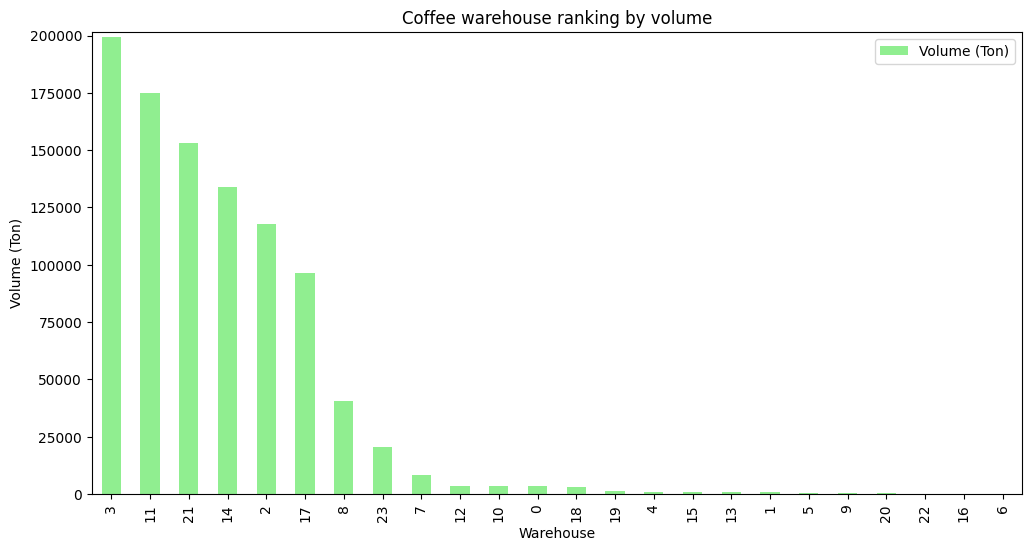

In [26]:
rank_warehouse_by_volume.plot(kind='bar', figsize=(12, 6), title='Coffee warehouse ranking by volume', color='lightgreen')
plt.xlabel('Warehouse')
plt.xticks(rotation=90)
plt.ylabel('Volume (Ton)')
plt.ylim(0, rank_warehouse_by_volume['Volume (Ton)'].max() + 2000)
plt.show()

##### -------------------------------------------------------------------------------
##### * Findings from warehouse coffee trading volume (ton) data:

###### Coffee trading in Ethiopia is highly concentrated in a few large warehouses, with BG, GM, and SC dominating the market by volume. Most other warehouses handle much smaller volumes, indicating a centralized trading

###### - Highest Trading Volumes:The warehouses BG (199,585.42 tons), GM (174,824.96 tons), and SC (153,264.03 tons) have the highest total trading volumes, indicating they are the main hubs for coffee trading.

###### - Moderate Volume Warehouses:Warehouses like HW (133,748.38 tons), BD (117,639.00 tons), and JM (96,261.28 tons) also handle significant volumes, contributing notably to the overall market activity.

###### -  Lowest Trading Volumes:Warehouses such as D2 (5.10 tons), J1 (183.77 tons), and W1 (200.05 tons) have the lowest trading volumes, suggesting limited trading activity or specialized operations.

###### - Large Disparity in Volumes:There is a substantial gap between the highest and lowest trading volumes among warehouses, highlighting a concentration of trading activity in a few major warehouses while many others handle much smaller amounts.
##### -------------------------------------------------------------------------------


##### * Symbol-Specific Analysis
##### * Which coffee symbol has the top 10 highest average daily trading volume?

In [27]:
avg_symbol_trade = et_coffee_x.groupby('Symbol').agg({'Volume (Ton)': 'mean', 'Trade Date': 'count'}).reset_index()
avg_symbol_trade.sort_values(by='Volume (Ton)', ascending=False, inplace=True)
avg_symbol_trade.head(10)

,Symbol,Volume (Ton),Trade Date
499,WSDA3,84.425688,218
189,UGM5,66.852308,13
232,UJMB4,66.730133,376
190,UGM6,62.711765,17
263,ULK6,59.796266,632
261,ULK4,56.097061,592
264,ULK7,55.369710,689
183,UGD7,48.923140,86
551,WYCA3,48.919000,60
218,UJM6,48.301515,33


##### * Do certain symbols consistently show positive/negative daily Percentage Change?



In [31]:
Symbol_percent_change = et_coffee_x.groupby('Symbol').agg({'percent_change':'sum'})
Symbol_percent_change

,percent_change
Symbol,
2LUFRA2,0.00
LUAM4,0.00
LUBL5A,0.86
LUBL5B,7.72
LUBL5C,0.44
...,...
WYCBQ2,0.00
WYCBUGnp,2.73
WYCBUGp,2.95


In [32]:
symbol_trade_relation = et_coffee_x['Symbol'].groupby(et_coffee_x['Trade Date'].dt.to_period('M')).count().reset_index()
symbol_trade_relation.head()

,Trade Date,Symbol
0,2012-01,49
1,2012-02,31
2,2012-03,436
3,2012-04,564
4,2012-05,614


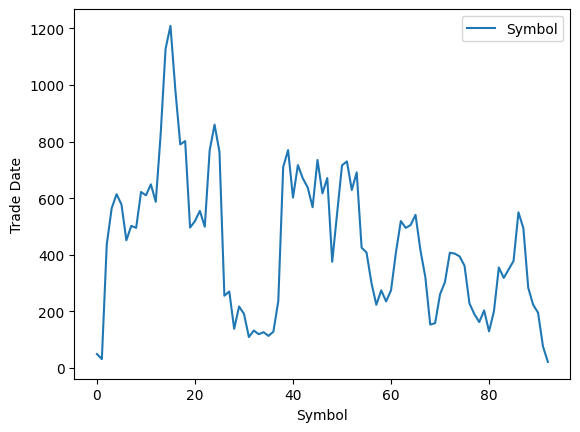

In [44]:
symbol_trade_relation.plot()
plt.xlabel('Symbol')
plt.ylabel('Trade Date')
plt.show()

In [25]:
ecx.head()

,Trade Date,Symbol,Warehouse,Production Year,Opening Price,Closing Price,High,Low,Change,Persetntage Change,Volume (Ton)
22,2012-03-12,WYKQ2,BG,2004-01-01,820.0,0.0,820.0,820.0,0,0.0,21.61
23,2012-03-14,WYKQ2,BG,2004-01-01,902.0,0.0,902.0,902.0,0,0.0,3.60
24,2012-03-16,WYKQ2,BG,2004-01-01,993.0,0.0,993.0,993.0,0,0.0,8.99
36,2012-04-27,WYKQ2,BG,2004-01-01,990.0,0.0,990.0,990.0,0,0.0,10.80
37,2012-05-11,WYKQ2,BG,2004-01-01,910.0,0.0,910.0,910.0,0,0.0,13.69


##### -----------------------------------------------------------------------------
##### * Findings from top 10 symbol average daily trading volume 

###### A small number of coffee symbols dominate the Ethiopian coffee exchange in terms of average daily trading volume, with both high volume and varying trade frequency, reflecting their importance and demand in the market.

###### Highest Average Volume:WSDA3 has the highest average daily trading volume (84.43 tons), making it the most actively traded symbol in the dataset.

###### Consistently High Volumes:Symbols like UGM5 (66.85 tons), UJMB4 (66.73 tons), UGM6 (62.71 tons), and ULK6 (59.80 tons) also show very high average daily volumes, indicating strong market demand for these coffee types.

###### Trade Frequency Variation:The number of trading days varies widely among symbols (e.g., ULK7 traded on 689 days, UJMB4 on 376 days, but UGM5 only on 13 days), suggesting some symbols are traded more regularly while others see high volume in fewer sessions.

###### Market Concentration:The top symbols account for significantly higher average daily volumes compared to others, highlighting a concentration of trading activity in a few key coffee types.
##### --------------------------------------------------------------------------------------


In [13]:
ecx.columns

Index(['Trade Date', 'Symbol', 'Warehouse', 'Production Year', 'Opening Price',
       'Closing Price', 'High', 'Low', 'Change', 'Persetntage Change',
       'Volume (Ton)'],
      dtype='object')

In [46]:
high_symbol_by_year = ecx[['High', 'Symbol']].groupby(ecx['Trade Date'].dt.year).max().reset_index()
high_symbol_by_year.sort_values(by='Trade Date', ascending=True, inplace=True)
high_symbol_by_year

,Trade Date,High,Symbol
0,2012,999.0,WYKQ2
1,2013,995.0,WYKQ2
2,2014,998.0,WYKQ2
3,2015,995.0,WYCBUGp
4,2016,999.0,WYCBUGp
5,2017,999.0,WYKQ2
6,2018,999.0,WYKQ2
7,2019,999.0,WYKQ2


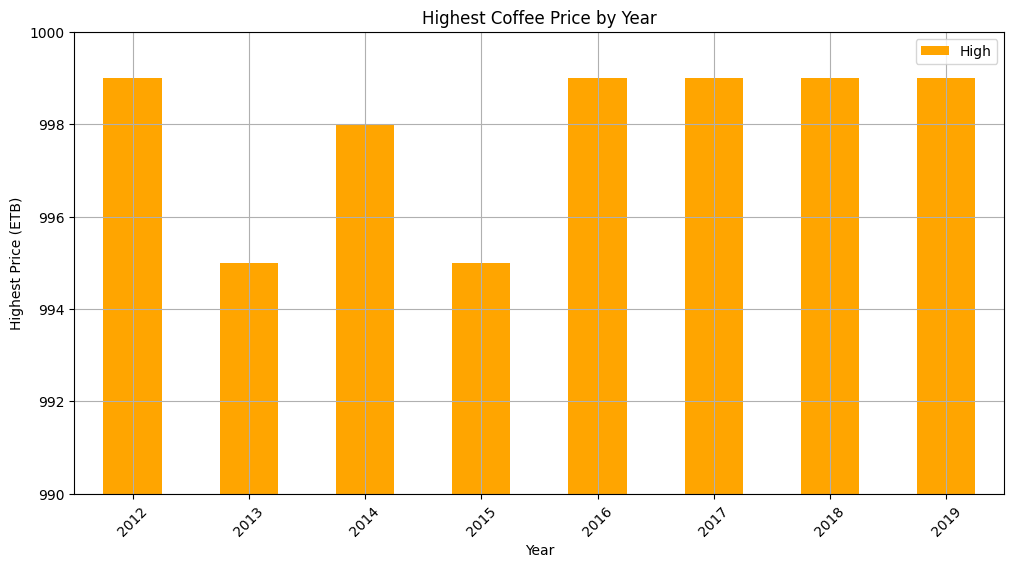

In [93]:
high_symbol_by_year.plot(kind='bar', x='Trade Date', y='High', figsize=(12, 6), title='Highest Coffee Price by Year', color='orange')
plt.xlabel('Year')      
plt.ylabel('Highest Price (ETB)')
plt.xticks(rotation=45)
plt.ylim(990, 1000)
plt.grid()
plt.show()

In [47]:
low_symbol_by_year = ecx[['Low', 'Symbol']].groupby(ecx['Trade Date'].dt.year).min().reset_index()
low_symbol_by_year.sort_values(by='Trade Date', ascending=True, inplace=True)
low_symbol_by_year

,Trade Date,Low,Symbol
0,2012,205.0,2LUFRA2
1,2013,170.0,LUBL5A
2,2014,230.0,LUBL5A
3,2015,170.0,LUBL5B
4,2016,99.0,LUBL5B
5,2017,120.0,LUBL5B
6,2018,281.0,LUAM4
7,2019,451.0,LUAM4


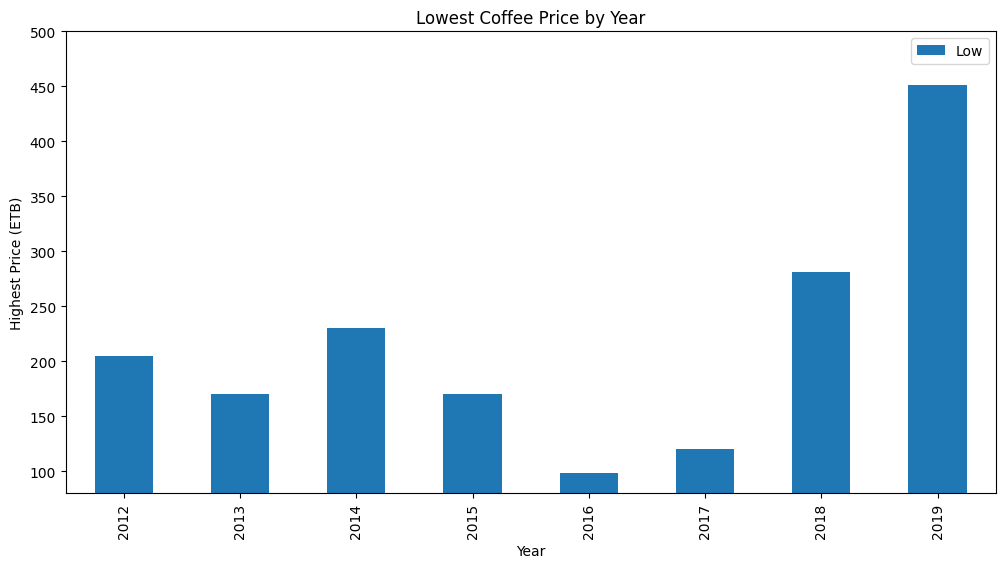

In [95]:
low_symbol_by_year.plot(kind='bar', x='Trade Date', y='Low', figsize=(12,6), title='Lowest Coffee Price by Year')
plt.xlabel('Year')
plt.ylabel('Highest Price (ETB)')
plt.ylim(80, 500)
plt.grid(False)
plt.show()

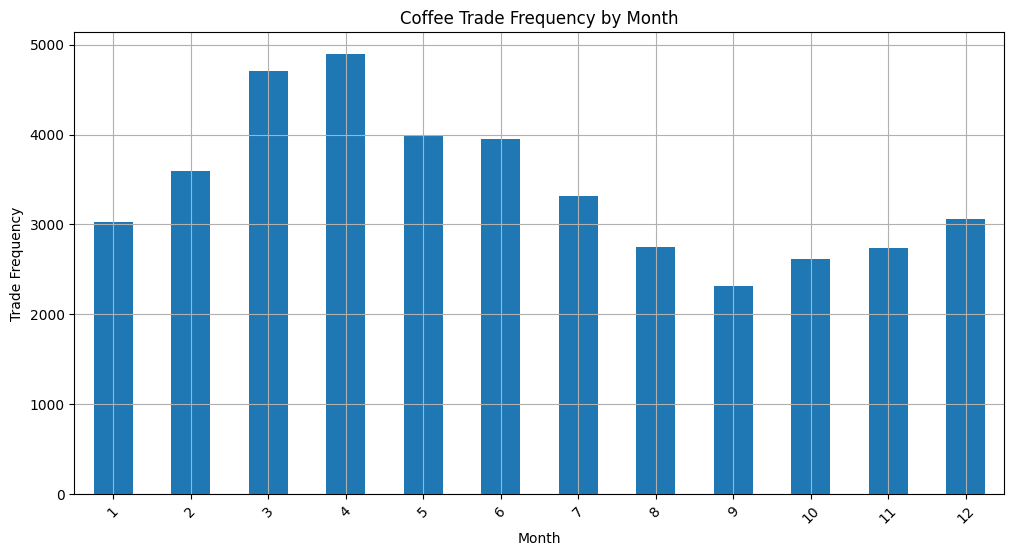

In [ ]:

ecx['Trade Date'].dt.month.value_counts().sort_index().plot(kind='bar', figsize=(12, 6), title='Coffee Trade Frequency by Month')
plt.xlabel('Month')     
plt.ylabel('Trade Frequency')
plt.xticks(rotation=45) 
plt.grid()
plt.show()

In [ ]:
ee = pd.read_excel(r'Coffee-2012.xlsx')
ee.head()

In [ ]:
#ee['Closing Price'] = pd.to_numeric(ee['Closing Price'], errors='coerce')
#ee['Opening Price'] = pd.to_numeric(ee['Opening Price'], errors='coerce')
#ee['High'] = pd.to_numeric(ee['High'], errors='coerce')
ee['Low'] = pd.to_numeric(ee['Low'], errors='coerce')


In [ ]:
re = ee.copy()
re.count().unique().sum()

In [ ]:
re.count().duplicated